<a href="https://colab.research.google.com/github/noelmt7/Adv_Data_Analytics/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/AirPassengers - AirPassengers.csv')
df.head(5)

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.describe()

,value
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

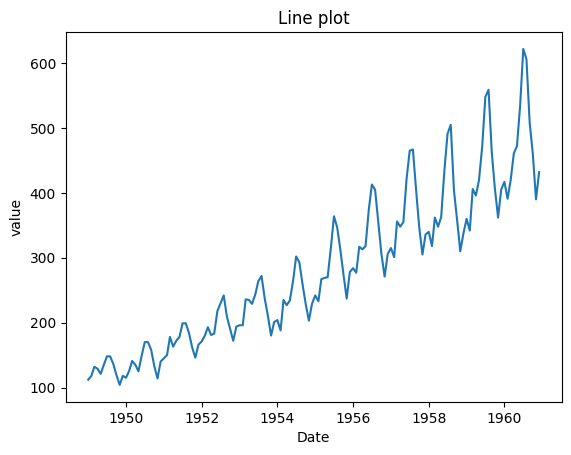

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['date'], df['value'])
plt.title("Line plot")
plt.xlabel("Date")
plt.ylabel("value")
plt.show()

In [ ]:
df = df.set_index('date', inplace=False)

Plot rolling Statistic

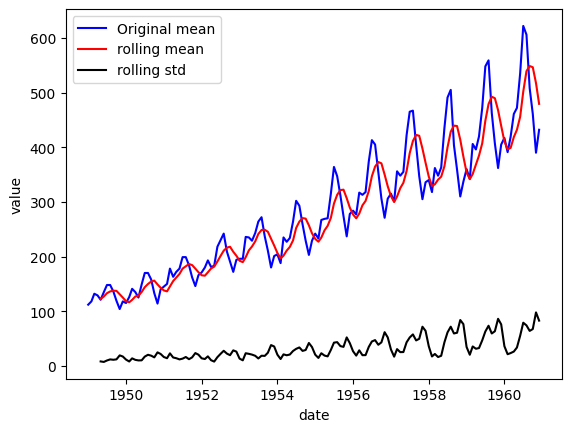

In [ ]:
movingaverage = df.rolling(window=5).mean()
movingSTD = df.rolling(window=5).std()

plt.plot(df, color='blue', label='Original mean')
plt.plot(movingaverage, color='red', label='rolling mean')
plt.plot(movingSTD, color='black', label='rolling std')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.show()

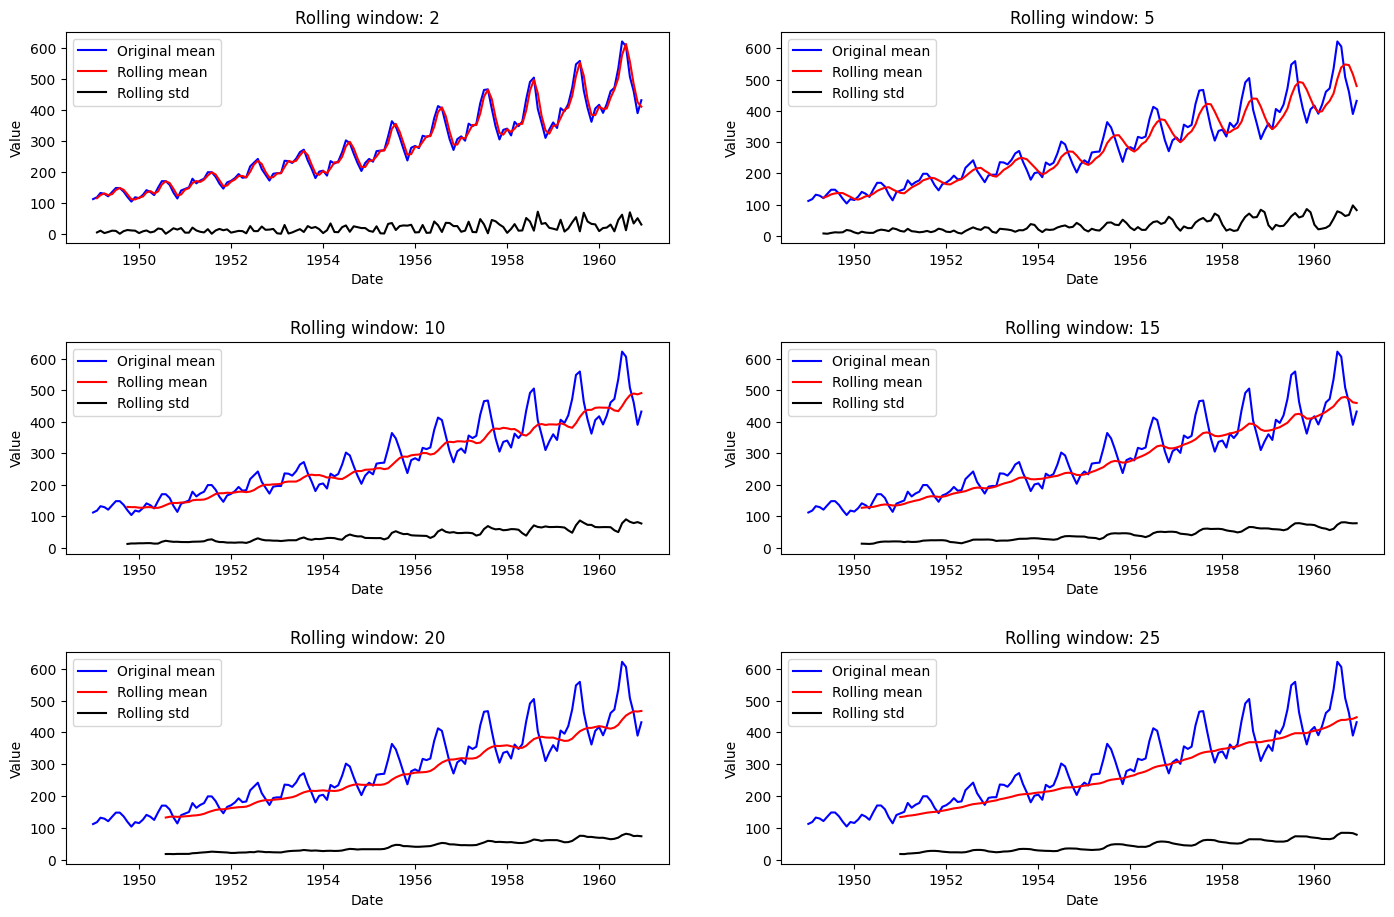

In [ ]:
window_values = [2, 5, 10, 15, 20, 25]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

for ax, window in zip(axes.flatten(), window_values):
    movingaverage = df.rolling(window=window).mean()
    movingSTD = df.rolling(window=window).std()

    ax.plot(df, color='blue', label='Original mean')
    ax.plot(movingaverage, color='red', label='Rolling mean')
    ax.plot(movingSTD, color='black', label='Rolling std')
    ax.set_title(f'Rolling window: {window}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

plt.show()

ADF is conducted with the following assumptions

* Null hypothesis(HO): Series is non-stationary, or series has a unit root
* aLTERNATE HYPOTHESIS(ha): sERIES IS STAIONARY, OR SERIES HAS NO UNIT ROOT


In [ ]:
#ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, Value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = Value
  print(dfoutput)

# call the function and run the test
adf_test(df['value'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Kwaiatowski-Philips-Schimdt-shin(KPSS) Test

the test is conducted with the following assumptions
* Null hypothesis (HO): series is trend stationary, or series has no unit root
* Alternate hypothesis(HA): series is non-staionary, or series has a unit root

conditions to fail to reject NUll hypothesis
* if the test staistics < critical value and p-value < 0.05 - fail to reject null hypothesis

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(timeseries):
  print('Results of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c', nlags='auto')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key, value in kpsstest[3].items():
    kpss_output['Critical Value (%s)' % key] = value
  print(kpss_output)

# call the function and run the test
kpss_test(df['value'])

Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-16-7dc4ced06d05>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags='auto')


Making  a time series Dictionary

<Axes: xlabel='date'>

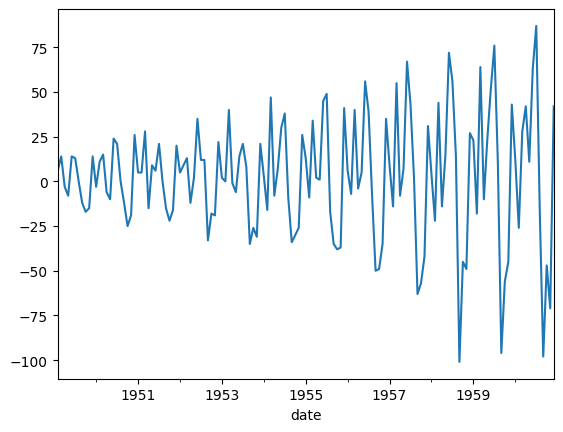

In [ ]:
df['value_diff'] = df['value'] - df['value'].shift(1)
df['value_diff'].dropna().plot()

Seasonal Differencing

<Axes: xlabel='date'>

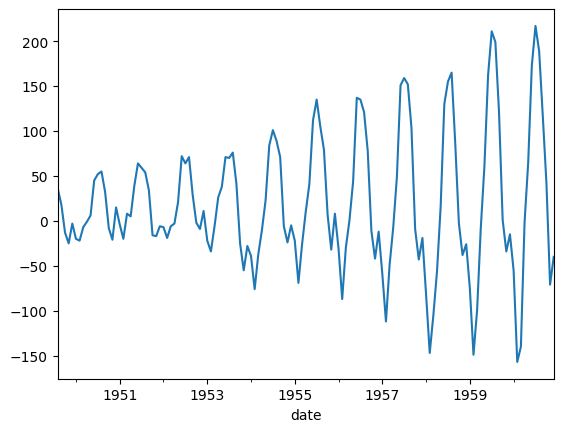

In [ ]:
n=7
df['value_diff_n'] = df['value'] - df['value'].shift(n)
df['value_diff_n'].dropna().plot()

Transformation common transformations include power transform, square root, and log transform

,value,value_diff,value_diff_n,value_log
date,,,,
1949-01-01,112,NaN,NaN,4.718499
1949-02-01,118,6.0,NaN,4.770685
1949-03-01,132,14.0,NaN,4.882802
1949-04-01,129,-3.0,NaN,4.859812
1949-05-01,121,-8.0,NaN,4.795791


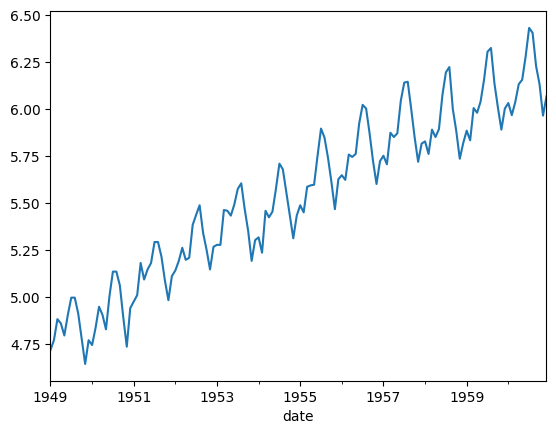

In [ ]:
import numpy as np
df['value_log'] = np.log(df['value'])
df['value_log'].dropna().plot()

df.head(5)

,value,value_diff,value_diff_n,value_log,value_sqrt
date,,,,,
1949-01-01,112,NaN,NaN,4.718499,10.583005
1949-02-01,118,6.0,NaN,4.770685,10.862780
1949-03-01,132,14.0,NaN,4.882802,11.489125
1949-04-01,129,-3.0,NaN,4.859812,11.357817
1949-05-01,121,-8.0,NaN,4.795791,11.000000


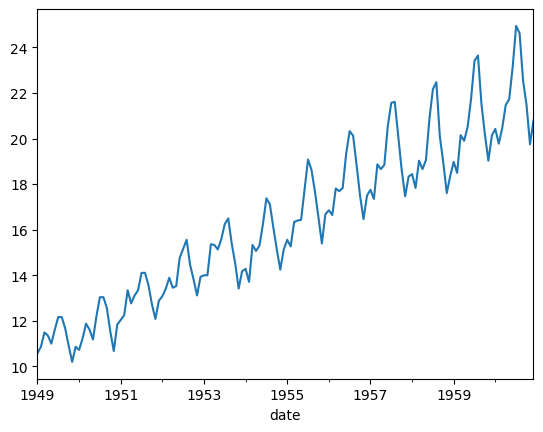

In [ ]:
df['value_sqrt'] = np.sqrt(df['value'])
df['value_sqrt'].dropna().plot()
df.head(5)

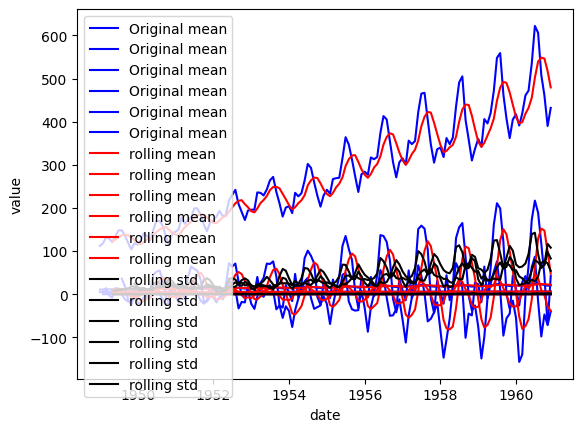

In [ ]:
df['value_log_diff'] = df['value_log'] - df['value_log'].shift(1)
movingaverage = df.rolling(window=5).mean()
movingSTD = df.rolling(window=5).std()

plt.plot(df, color='blue', label='Original mean')
plt.plot(movingaverage, color='red', label='rolling mean')
plt.plot(movingSTD, color='black', label='rolling std')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.show()

# TIME SERIES COMPONENTS

- Additive Model = Trend+Seasonality+Residual
- Multiplicative Model = Trend * Seasonality * Residual

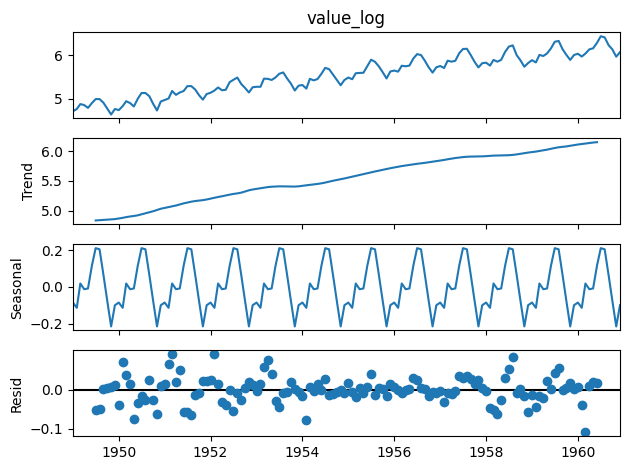

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['value_log'], model = 'additive')
decomposition.plot()
plt.show()

In [ ]:
decomposition.seasonal

date
1949-01-01   -0.085815
1949-02-01   -0.114413
1949-03-01    0.018113
1949-04-01   -0.013046
1949-05-01   -0.008966
                ...   
1960-08-01    0.204512
1960-09-01    0.064836
1960-10-01   -0.075271
1960-11-01   -0.215846
1960-12-01   -0.100315
Name: seasonal, Length: 144, dtype: float64

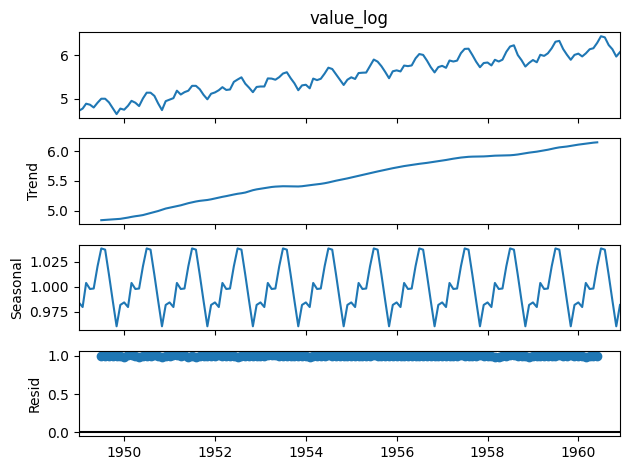

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['value_log'], model = 'multiplicative')
decomposition.plot()
plt.show()


## ***Auto-Correlation***

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

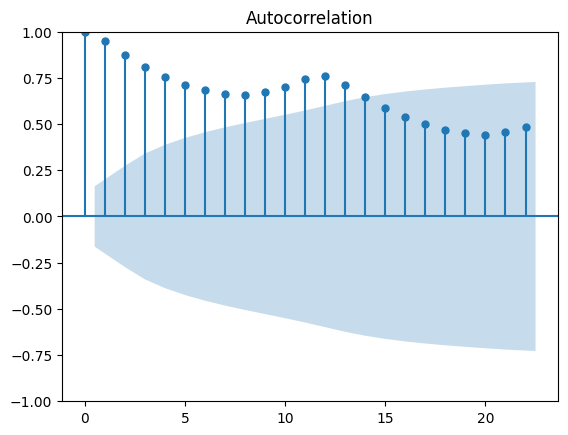

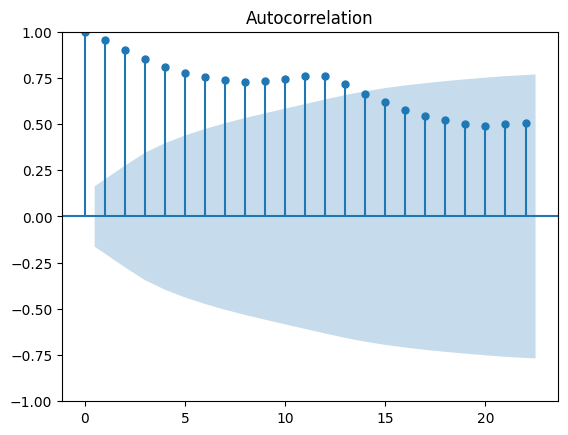

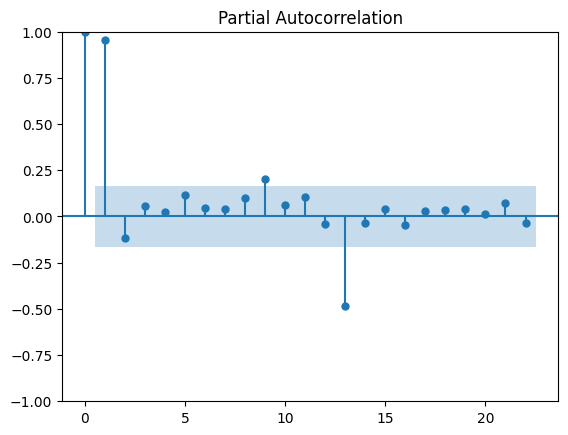

In [ ]:
#blue shaded area is confidence level

plot_acf(df['value'])
plt.show()

plot_acf(df['value_log'])
plt.show()

# to get the best lag value
# the highest peak for the lag value is selected as the lag value
plot_pacf(df['value_log'])
plt.show()

# ARIMA

- p = no. of lag observations
- d = no. of times data is differenced
- q = no. of lagged forecastt errors

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


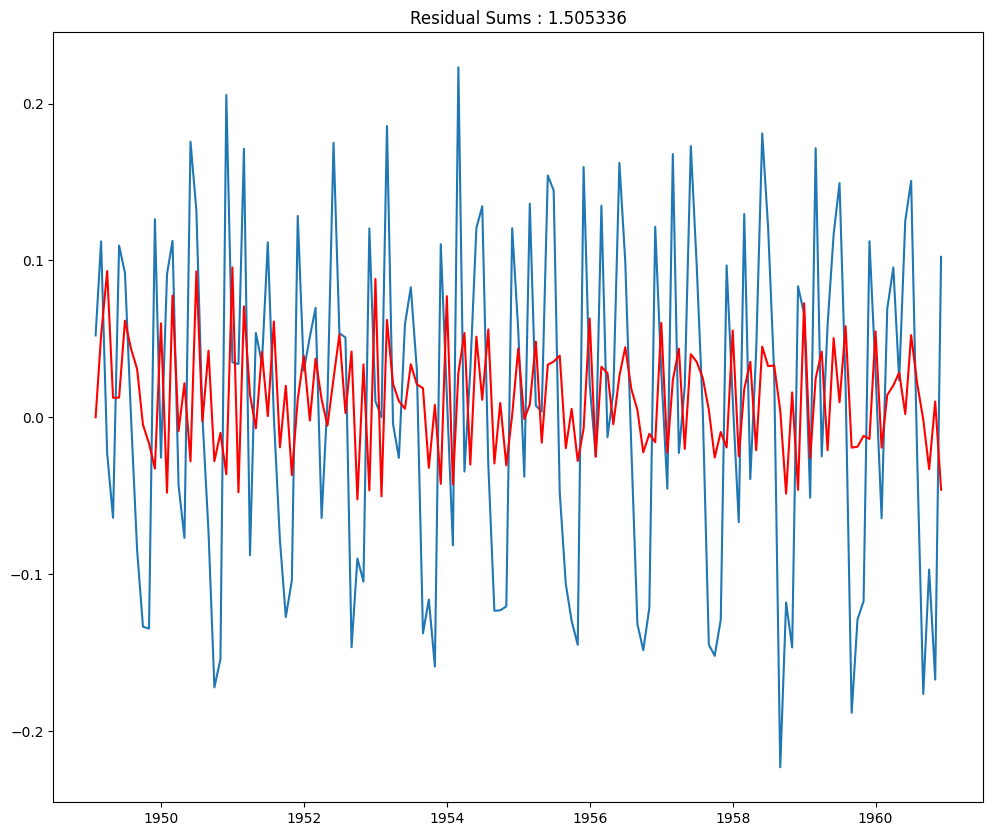

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(df['value']).diff().dropna()
model1 = ARIMA(ts_log, order=(2,1 , 2))
results_AR = model1.fit()
plt.figure(figsize=(12,10))
plt.plot(ts_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('Residual Sums : %4f' %sum((results_AR.fittedvalues - ts_log)**2))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


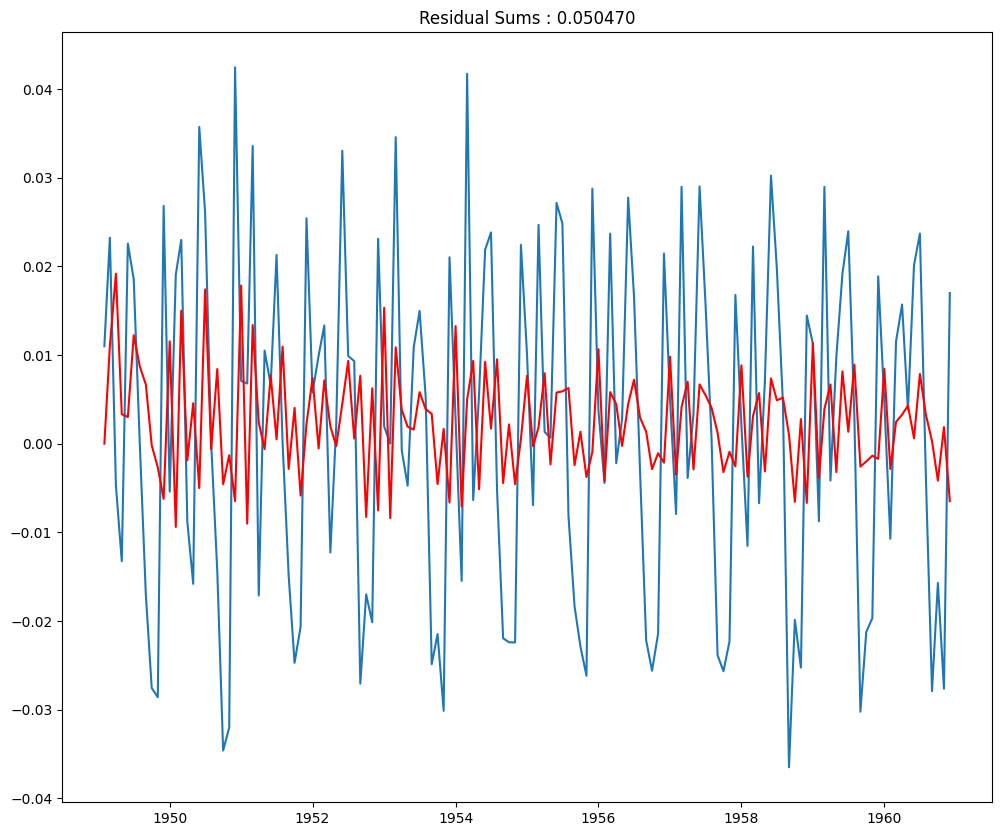

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(df['value_log']).diff().dropna()
model1 = ARIMA(ts_log, order=(2,1 , 2))
results_AR = model1.fit()
plt.figure(figsize=(12,10))
plt.plot(ts_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('Residual Sums : %4f' %sum((results_AR.fittedvalues - ts_log)**2))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


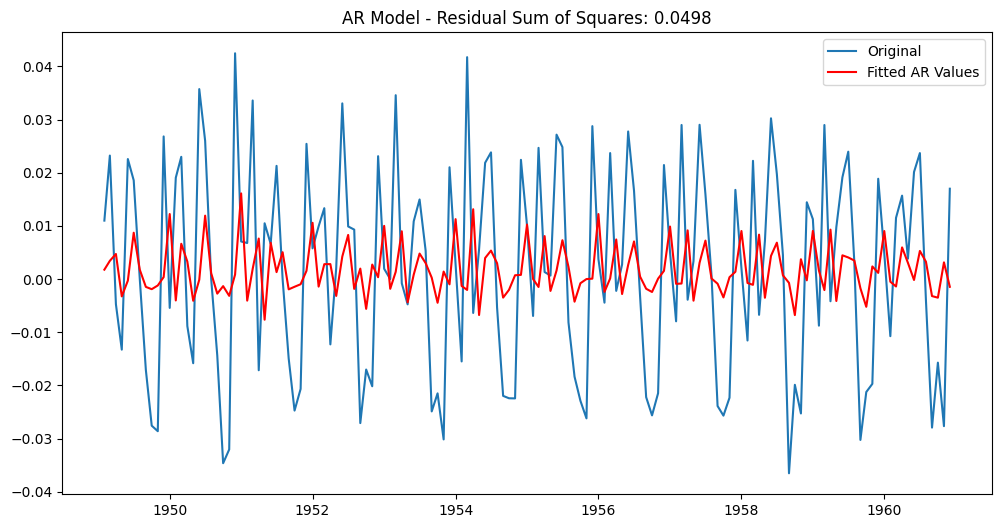

In [ ]:
# Taking the log of the time series and differencing it to make it stationary
ts_log_diff = np.log(df['value_log']).diff().dropna()

# Fitting the AR model (order=(p,0,0))
model_ar = ARIMA(ts_log_diff, order=(2, 0, 0))
results_ar = model_ar.fit()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(ts_log_diff, label='Original')
plt.plot(results_ar.fittedvalues, color='red', label='Fitted AR Values')
plt.title('AR Model - Residual Sum of Squares: %.4f' % sum((results_ar.fittedvalues - ts_log_diff)**2))
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


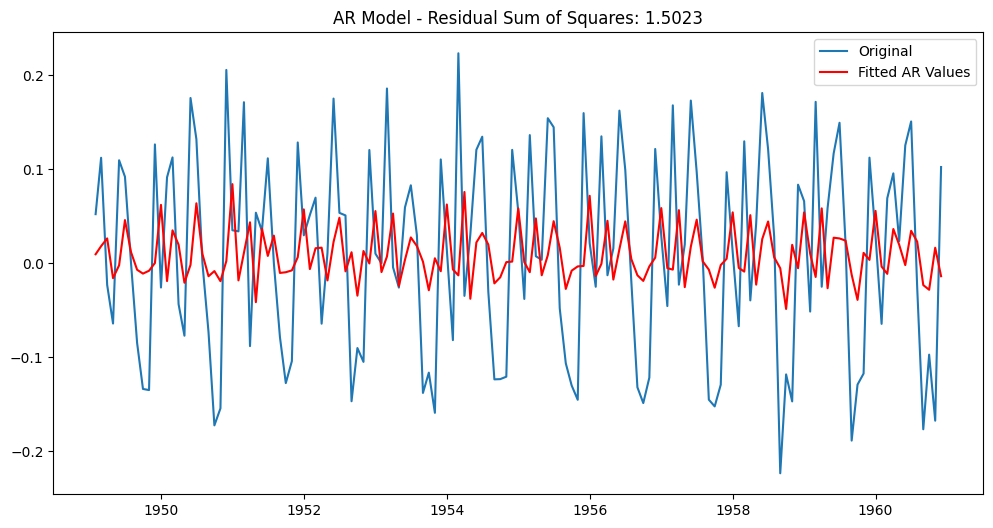

In [ ]:
ts_log = np.log(df['value']).diff().dropna()


# Fitting the AR model (order=(p,0,0))
model_ar1 = ARIMA(ts_log, order=(2, 0, 0))
results_ar1 = model_ar1.fit()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(ts_log, label='Original')
plt.plot(results_ar1.fittedvalues, color='red', label='Fitted AR Values')
plt.title('AR Model - Residual Sum of Squares: %.4f' % sum((results_ar1.fittedvalues - ts_log_diff)**2))
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


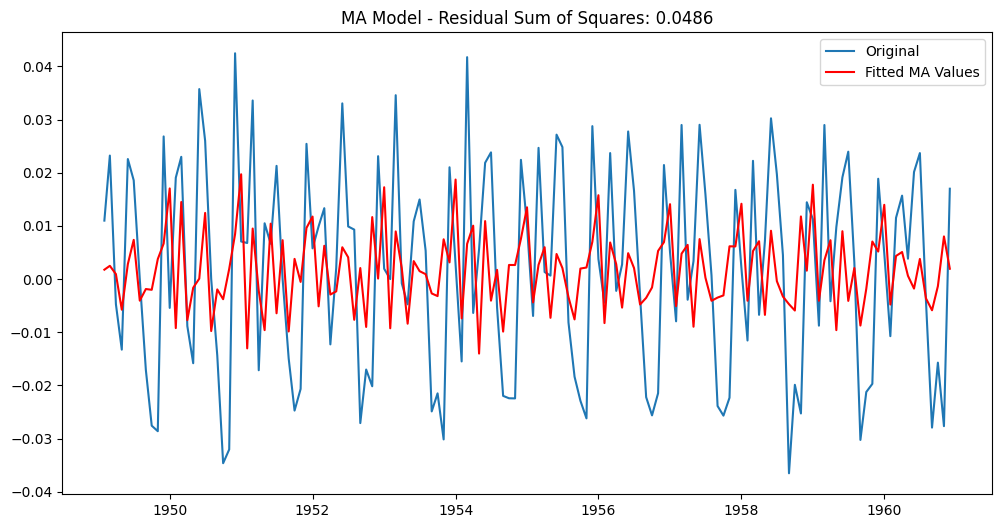

In [ ]:
# Fitting the MA model (order=(0,0,q))
model_ma = ARIMA(ts_log_diff, order=(0, 0, 2))
results_ma = model_ma.fit()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(ts_log_diff, label='Original')
plt.plot(results_ma.fittedvalues, color='red', label='Fitted MA Values')
plt.title('MA Model - Residual Sum of Squares: %.4f' % sum((results_ma.fittedvalues - ts_log_diff)**2))
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


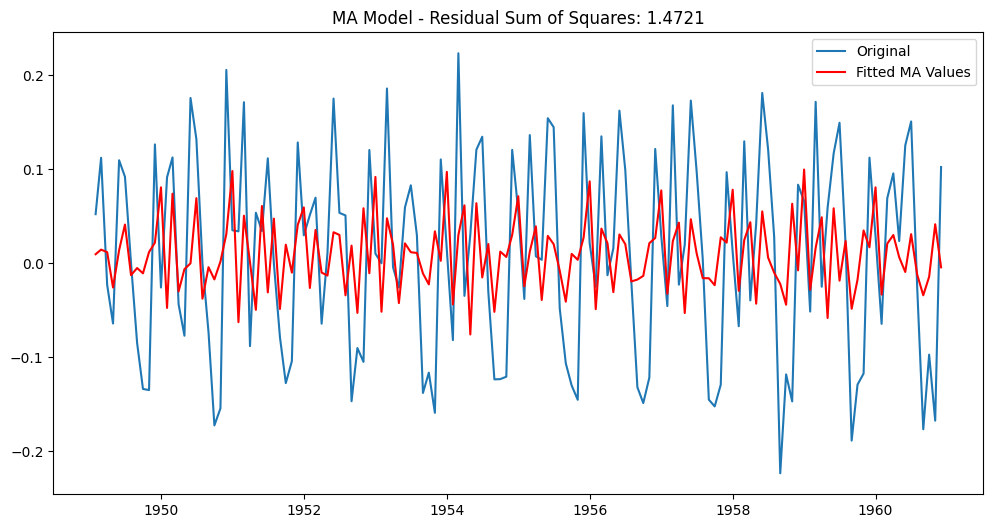

In [ ]:
# Fitting the MA model (order=(0,0,q))
model_ma = ARIMA(ts_log, order=(0, 0, 2))
results_ma = model_ma.fit()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(ts_log_diff, label='Original')
plt.plot(results_ma.fittedvalues, color='red', label='Fitted MA Values')
plt.title('MA Model - Residual Sum of Squares: %.4f' % sum((results_ma.fittedvalues - ts_log_diff)**2))
plt.legend()
plt.show()




---



---



In [ ]:
summary_table = pd.DataFrame({
    'Model': ['AR(2, 0 , 0)', 'MA(0, 0 ,2)', 'ARMA(2,1,2)'],
    'Residual Sum of Squares(diff)', '': [
        sum((results_ar.fittedvalues - ts_log_diff)**2),
        sum((results_ma.fittedvalues - ts_log_diff)**2),
        sum((results_AR.fittedvalues - ts_log_diff)**2)
    ]
})

print(summary_table)

          Model  Residual Sum of Squares
0  AR(2, 0 , 0)                 0.049796
1   MA(0, 0 ,2)                 0.048648
2   ARMA(2,1,2)                 0.050470
